In [36]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical 
import pickle
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras import models
model = models.load_model('fruit_classification.h5')
import mysql.connector
cnx = mysql.connector.connect(
    host="localhost",
    port=3310,
    user="root",
    password="",
    db="afdd")
cur = cnx.cursor()
#['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']
def check_defection(img):
    img=cv2.resize(img,(100,100))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    X=np.array(img)
    X=X/255.0
    p = model.predict_classes(X.reshape(1,100,100,3))
    if p==[0]:
        print("Fresh Apple")
        #insert_F_Apple()
        cur.execute("SELECT COUNT(*) FROM `record` WHERE `Fruit_Name`='Apple' and `Date_of_Processing`= CURDATE()")
        count_row = cur.fetchone()
        count = count_row[0]
        if count == 0:
            query="INSERT INTO record (`Fruit_Name`, `Total_Kgs`, `Usable_Kgs`, `Unusable_Kgs`, `Date_of_Processing`) VALUES ('Apple',1,1,0,CURDATE());"
            cur.execute(query)
            cnx.commit()
            print("one row inserted")
        else:
            query="UPDATE record SET Total_Kgs = Total_Kgs + 1, Usable_Kgs = Usable_Kgs + 1 WHERE `Date_of_Processing` = CURDATE() AND Fruit_Name = 'Apple'";
            cur.execute(query)
            cnx.commit()
            print("updated")
    elif p==[1]:
        print("Fresh Banana")
        cur.execute("SELECT COUNT(*) FROM `record` WHERE `Fruit_Name`='Banana' and `Date_of_Processing`= CURDATE()")
        count_row = cur.fetchone()
        count = count_row[0]
        if count == 0:
            query="INSERT INTO record (`Fruit_Name`, `Total_Kgs`, `Usable_Kgs`, `Unusable_Kgs`, `Date_of_Processing`) VALUES ('Banana',1,1,0,CURDATE());"
            cur.execute(query)
            cnx.commit()
            print("one row inserted")
        else:
            query="UPDATE record SET Total_Kgs = Total_Kgs + 1, Usable_Kgs = Usable_Kgs + 1 WHERE `Date_of_Processing` = CURDATE() AND Fruit_Name = 'Banana'";
            cur.execute(query)
            cnx.commit()
            print("updated")
    elif p==[2]:
        print("Fresh Orange")
        cur.execute("SELECT COUNT(*) FROM `record` WHERE `Fruit_Name`='Orange' and `Date_of_Processing`= CURDATE()")
        count_row = cur.fetchone()
        count = count_row[0]
        if count == 0:
            query="INSERT INTO record (`Fruit_Name`, `Total_Kgs`, `Usable_Kgs`, `Unusable_Kgs`, `Date_of_Processing`) VALUES ('Orange',1,1,0,CURDATE());"
            cur.execute(query)
            cnx.commit()
            print("one row inserted")
        else:
            query="UPDATE record SET Total_Kgs = Total_Kgs + 1, Usable_Kgs = Usable_Kgs + 1 WHERE `Date_of_Processing` = CURDATE() AND Fruit_Name = 'Orange'";
            cur.execute(query)
            cnx.commit()
            print("updated")
    elif p==[3]:
        print("Defected Apple")
        cur.execute("SELECT COUNT(*) FROM `record` WHERE `Fruit_Name`='Apple' and `Date_of_Processing`= CURDATE()")
        count_row = cur.fetchone()
        count = count_row[0]
        if count == 0:
            query="INSERT INTO record (`Fruit_Name`, `Total_Kgs`, `Usable_Kgs`, `Unusable_Kgs`, `Date_of_Processing`) VALUES ('Apple',1,0,1,CURDATE());"
            cur.execute(query)
            cnx.commit()
            print("one row inserted")
        else:
            query="UPDATE record SET Total_Kgs = Total_Kgs + 1, Unusable_Kgs = Unusable_Kgs + 1 WHERE `Date_of_Processing` = CURDATE() AND Fruit_Name = 'Apple'";
            cur.execute(query)
            cnx.commit()
            print("updated")
    elif p==[4]:
        print("Defected Banana")
        cur.execute("SELECT COUNT(*) FROM `record` WHERE `Fruit_Name`='Banana' and `Date_of_Processing`= CURDATE()")
        count_row = cur.fetchone()
        count = count_row[0]
        if count == 0:
            query="INSERT INTO record (`Fruit_Name`, `Total_Kgs`, `Usable_Kgs`, `Unusable_Kgs`, `Date_of_Processing`) VALUES ('Banana',1,0,1,CURDATE());"
            cur.execute(query)
            cnx.commit()
            print("one row inserted")
        else:
            query="UPDATE record SET Total_Kgs = Total_Kgs + 1, Unusable_Kgs = Unusable_Kgs + 1 WHERE `Date_of_Processing` = CURDATE() AND Fruit_Name = 'Banana'";
            cur.execute(query)
            cnx.commit()
            print("updated")      
    elif p==[5]:
        print("Defected Orange")
        cur.execute("SELECT COUNT(*) FROM `record` WHERE `Fruit_Name`='Orange' and `Date_of_Processing`= CURDATE()")
        count_row = cur.fetchone()
        count = count_row[0]
        if count == 0:
            query="INSERT INTO record (`Fruit_Name`, `Total_Kgs`, `Usable_Kgs`, `Unusable_Kgs`, `Date_of_Processing`) VALUES ('Orange',1,0,1,CURDATE());"
            cur.execute(query)
            cnx.commit()
            print("one row inserted")
        else:
            query="UPDATE record SET Total_Kgs = Total_Kgs + 1, Unusable_Kgs = Unusable_Kgs + 1 WHERE `Date_of_Processing` = CURDATE() AND Fruit_Name = 'Orange'";
            cur.execute(query)
            cnx.commit()
            print("updated")
#def insert_F_Apple():
    #print("Fresh Apple")    
#def insert_D_Apple():
    #print("Defected Apple")    
#def insert_F_Banana():
    #print("Fresh Banana")   
#def insert_D_Banana():
    #print("Defected Banana")   
#def insert_F_Orange():
    #print("Fresh Orange")
#def insert_D_Orange():
    #print("Defected Orange")   

Fresh Apple
updated


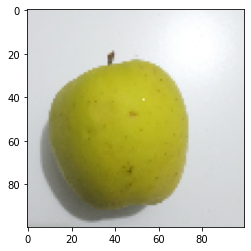

In [35]:
img = cv2.imread("rez_Ap1.jpg")
check_defection(img)

Defected Apple
updated


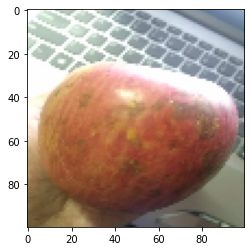

In [37]:
img = cv2.imread("apple1.jpg")
check_defection(img)

Defected Apple
updated


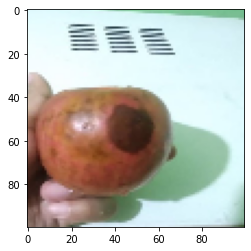

In [38]:
img = cv2.imread("apple3.jpg")
check_defection(img)

Defected Banana
one row inserted


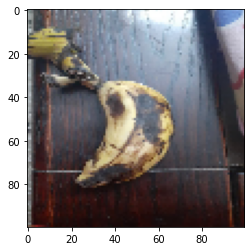

In [39]:
img = cv2.imread("banana2.jpg")
check_defection(img)

Defected Banana
updated


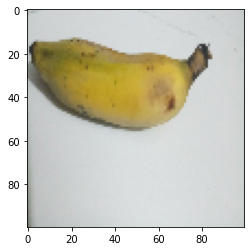

In [40]:
img = cv2.imread("rez.jpg")
check_defection(img)

Fresh Orange
one row inserted


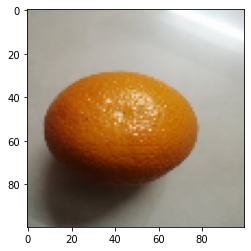

In [41]:
img = cv2.imread("or.jpg")
check_defection(img)

Fresh Orange
updated


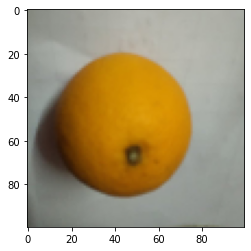

In [42]:
img = cv2.imread("or3.jpg")
check_defection(img)